In [99]:
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.environ['PYTHONPATH'] = project_root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("PYTHONPATH manually set to:", os.environ['PYTHONPATH'])

PYTHONPATH manually set to: c:\Users\ndhaj\Desktop\GraphicalPR


In [100]:
import numpy as np
from graph.structure import Graph
from graph.prior.gaussian_prior import GaussianPrior
from graph.prior.support_prior import SupportPrior
from graph.measurement.amplitude_measurement import AmplitudeMeasurement
from graph.propagator.fft_2d_propagator import FFT2DPropagator
from core.linalg_utils import circular_aperture

In [101]:
# パラメータ設定
shape = (64, 64)
support = circular_aperture(shape, radius=0.25)
rng = np.random.default_rng(42)

In [102]:
# グラフ定義
class MultiplyTestGraph(Graph):
    def __init__(self):
        super().__init__()
        X = GaussianPrior(var = 1.0, shape = shape, label="X")
        Y = GaussianPrior(var = 1.0, shape = shape, label="Y")
        Z = X * Y  # MultiplyPropagatorを介して構成される

        # 測定ノード（適当なものでOK）
        self.meas = AmplitudeMeasurement(var=1e-3) @ (FFT2DPropagator() @ Z)
        self.compile()

In [103]:
g = MultiplyTestGraph()

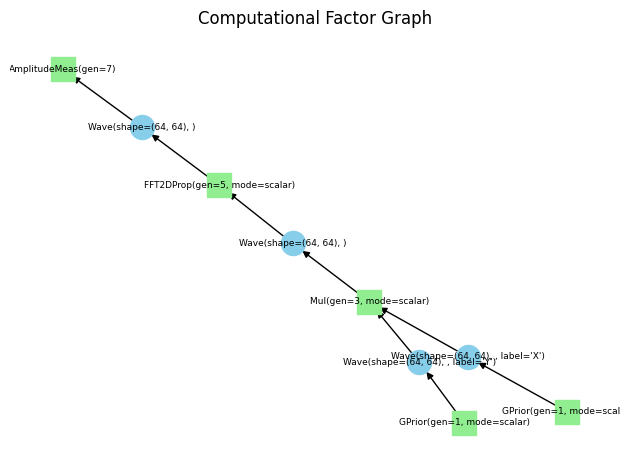

In [104]:
g.visualize(layout="kamada_kawai", font_size=6.5, scale=2.0)

BP Iteration: 100%|██████████| 10/10 [00:00<00:00, 6000.43it/s]


[t=0] PMSE = 1.66470e+00
[t=1] PMSE = 1.89758e-03
[t=2] PMSE = 1.85102e-04
[t=3] PMSE = 1.83521e-04
[t=4] PMSE = 1.83522e-04
[t=5] PMSE = 1.83522e-04
[t=6] PMSE = 1.83522e-04
[t=7] PMSE = 1.83522e-04
[t=8] PMSE = 1.83522e-04
[t=9] PMSE = 1.83522e-04


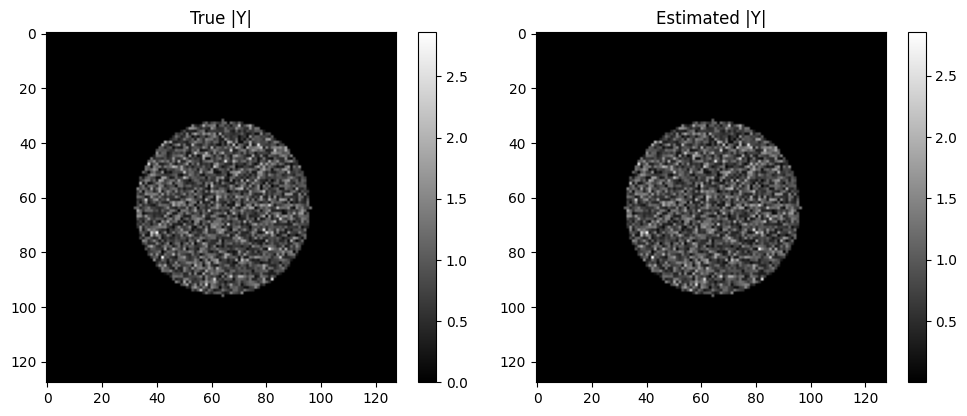

In [105]:
# ==== Imports ====
import numpy as np
import matplotlib.pyplot as plt

from core.linalg_utils import random_normal_array, circular_aperture
from core.metrics import pmse
from graph.structure.graph import Graph
from graph.prior.const_wave import ConstWave
from graph.prior.support_prior import SupportPrior
from graph.measurement.gaussian_measurement import GaussianMeasurement
from graph.propagator.multiply_propagator import MultiplyPropagator

# ==== 1. パラメータ ====
H, W = 128, 128
shape = (H, W)
var = 1e-4
large_value = 1e6
rng = np.random.default_rng(42)

# Known input X
x_ref = random_normal_array(shape, dtype=np.complex128, rng=rng)

# Support for unknown Y
support = circular_aperture(shape, radius=0.25)

# ==== 2. グラフ定義 ====
class MultiplyGraph(Graph):
    def __init__(self):
        super().__init__()
        self.X = ConstWave(data=x_ref, large_value=large_value, label="X_ref")
        self.Y = SupportPrior(support=support, label="Y_unknown")
        self.Z = self.X * self.Y  # MultiplyPropagator via __mul__
        self.meas = GaussianMeasurement(var=var) @ self.Z
        self.compile()

# ==== 3. 初期化と推論 ====
g = MultiplyGraph()
g.set_init_rng(np.random.default_rng(seed=1))
g.generate_sample(rng=np.random.default_rng(seed=123), update_observed=True)

true_y = g.get_wave("Y_unknown").get_sample()

def monitor(graph, t):
    est = graph.get_wave("Y_unknown").compute_belief().data
    err = pmse(est, true_y)
    print(f"[t={t}] PMSE = {err:.5e}")

g.run(n_iter=10, callback=monitor)

# ==== 4. 可視化 ====
est = g.get_wave("Y_unknown").compute_belief().data

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("True |Y|")
plt.imshow(np.abs(true_y), cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Estimated |Y|")
plt.imshow(np.abs(est), cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

[t=0] PMSE = 2.20415e+00
[t=20] PMSE = 2.21128e+00
[t=40] PMSE = 2.09086e+00
[t=60] PMSE = 3.44282e-03
[t=80] PMSE = 1.50479e-04
[t=100] PMSE = 1.48118e-04
[t=120] PMSE = 1.48118e-04
[t=140] PMSE = 1.48118e-04
[t=160] PMSE = 1.48118e-04
[t=180] PMSE = 1.48118e-04
[t=200] PMSE = 1.48118e-04
[t=220] PMSE = 1.48118e-04
[t=240] PMSE = 1.48118e-04
[t=260] PMSE = 1.48118e-04
[t=280] PMSE = 1.48118e-04
[t=300] PMSE = 1.48118e-04
[t=320] PMSE = 1.48118e-04
[t=340] PMSE = 1.48118e-04
[t=360] PMSE = 1.48118e-04
[t=380] PMSE = 1.48118e-04
[t=400] PMSE = 1.48118e-04
[t=420] PMSE = 1.48118e-04
[t=440] PMSE = 1.48118e-04
[t=460] PMSE = 1.48118e-04
[t=480] PMSE = 1.48118e-04
[t=500] PMSE = 1.48118e-04
[t=520] PMSE = 1.48118e-04
[t=540] PMSE = 1.48118e-04
[t=560] PMSE = 1.48118e-04
[t=580] PMSE = 1.48118e-04
[t=600] PMSE = 1.48118e-04
[t=620] PMSE = 1.48118e-04
[t=640] PMSE = 1.48118e-04
[t=660] PMSE = 1.48118e-04
[t=680] PMSE = 1.48118e-04
[t=700] PMSE = 1.48118e-04
[t=720] PMSE = 1.48118e-04
[t=740]

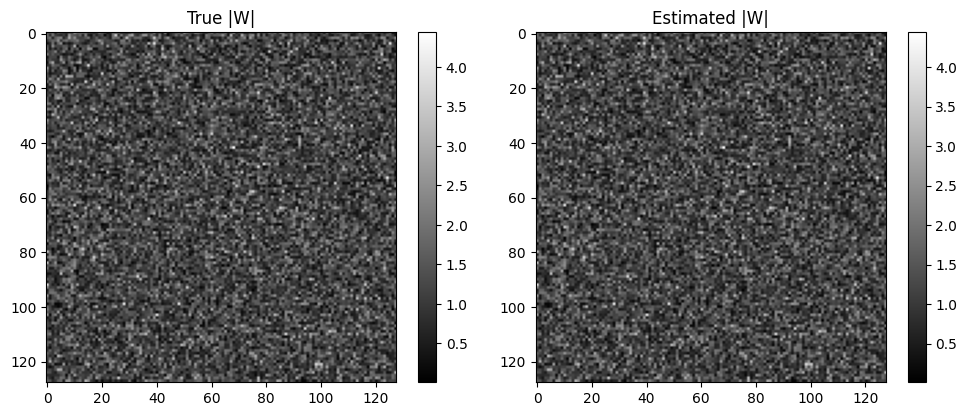

In [106]:
# ==== Imports ====
import numpy as np
import matplotlib.pyplot as plt

from core.metrics import pmse
from core.linalg_utils import random_normal_array, circular_aperture, random_phase_mask
from graph.structure.graph import Graph
from graph.prior.const_wave import ConstWave
from graph.prior.gaussian_prior import GaussianPrior
from graph.propagator.fft_2d_propagator import FFT2DPropagator
from graph.propagator.add_propagator import AddPropagator
from graph.propagator.multiply_propagator import MultiplyPropagator
from graph.measurement.amplitude_measurement import AmplitudeMeasurement

# ==== 1. パラメータ ====
H, W = 128, 128
shape = (H, W)
var = 1e-4
rng = np.random.default_rng(123)
x = random_phase_mask(shape, rng=rng)
y = random_phase_mask(shape, rng=rng)
z = random_phase_mask(shape, rng=rng)
v = random_phase_mask(shape, rng=rng)

# ==== 2. グラフ定義 ====
class MixedMeasurementGraph(Graph):
    def __init__(self):
        super().__init__()
        self.X = ConstWave(data=x, label="X")
        self.Y = ConstWave(data=y, label="Y")
        self.Z = ConstWave(data=z, label="Z")
        self.V =  ConstWave(data=v, label="V")
        self.W = GaussianPrior(shape=shape, var=1.0, label="W_unknown")

        # Define paths
        A1 = self.X * self.W
        A2 = self.Y * self.W
        A3 = self.Z * self.W
        A4 = self.V * self.W

        # Measurements
        self.M1 = AmplitudeMeasurement(var=var, damping = 0.3) @ (FFT2DPropagator(shape) @ A1)
        self.M2 = AmplitudeMeasurement(var=var, damping = 0.3) @ (FFT2DPropagator(shape) @ A2)
        self.M3 = AmplitudeMeasurement(var=var, damping = 0.3) @ (FFT2DPropagator(shape) @ A3)
        self.M4 = AmplitudeMeasurement(var=var, damping = 0.3) @ (FFT2DPropagator(shape) @ A4)

        self.compile()

# ==== 3. 推論・初期化 ====
g = MixedMeasurementGraph()
g.set_init_rng(np.random.default_rng(seed=999))
g.generate_sample(rng=np.random.default_rng(seed=100), update_observed=True)

true_w = g.get_wave("W_unknown").get_sample()

def monitor(graph, t):
    est = graph.get_wave("W_unknown").compute_belief().data
    err = pmse(est, true_w)
    if t % 20 == 0:
        print(f"[t={t}] PMSE = {err:.5e}")

g.run(n_iter=800, callback=monitor, verbose = None)

# ==== 4. 可視化 ====
est = g.get_wave("W_unknown").compute_belief().data

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("True |W|")
plt.imshow(np.abs(true_w), cmap="gray")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Estimated |W|")
plt.imshow(np.abs(est), cmap="gray")
plt.colorbar()

plt.tight_layout()
plt.show()


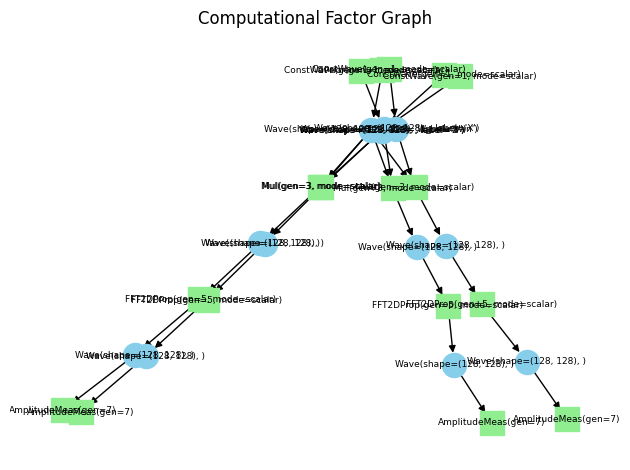

In [107]:
g.visualize(layout="kamada_kawai", font_size=6.5, scale=2.0)